#  Extracting Data from CSV

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
data=pd.read_csv("Crop Production data.csv")
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [146]:
data.shape

(246091, 7)

# Data Cleaning

In [147]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [148]:
data.dropna(inplace=True)
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [149]:
data.duplicated().sum()

np.int64(0)

In [150]:
data.shape

(242361, 7)

In [151]:
# checking unique type of season
data.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [152]:
# here we remove unwanted white spaces from season column 

data['Season']=data['Season'].apply(lambda x : x.strip())
data['Crop']=data['Crop'].apply(lambda x : x.strip())

In [153]:
# after removing white spaces

data.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [154]:

# checking the values counts of each season

data['Season'].value_counts()

Season
Kharif        94283
Rabi          66160
Whole Year    56127
Summer        14811
Winter         6050
Autumn         4930
Name: count, dtype: int64

In [189]:
'''since there are Three types of crop out of which two are mainly seasonal Rabi and Kharif and one is for whole year but
 6 crops season were present in our datset.we got to know that summer and Autumn synonyms of Kharif and winter is synonyms of
 of Rabi so we decided to replace with their original name which is Kharif Rabi'''

data['Season']=data['Season'].apply(lambda x : x.replace('Autumn','Kharif'))
data['Season']=data['Season'].apply(lambda x : x.replace('Summer','Kharif'))
data['Season']=data['Season'].apply(lambda x : x.replace('Winter','Rabi'))

In [190]:
#Checking values counts of season after replacing wiyh their original name

data['Season'].value_counts()

Season
Kharif        113167
Rabi           71686
Whole Year     51352
Name: count, dtype: int64

In [157]:
# we have observed that many values of producation were 0 since it is represntating producation of whole district
# so we decided drop all rows whose producation values are zero

data.drop(data[data['Production']==0].index,inplace=True)

print(f'After removing the row which has 0 Production : {data.shape[0]}')

After removing the row which has 0 Production : 238838


In [158]:
# checking unique crops names 
# we observed that many crops were presenyed with their syononame so we decided all syononyms of crops to replace with their popular name
# like paddy and rice are same so we replace paddy with Rice
# also number of rows of crops sub-category were very less

data.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Beans & Mutter(Vegetable)', 'Bhindi',
       'Brinjal', 'Citrus Fruit', 'Grapes', 'Mango', 'Orange',
       'Other Fresh Fruits', 'Papaya', 'Pome Fruit', 'Tomato', 'Soyabean',
       'Mesta', 'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota',
       'Cabbage', 'Rapeseed &Mustard', 'Niger seed', 'Varagu', 'Garlic',
       'Ginger', 'Oilseeds total', 'Pulses total', 'Jute',
       'Peas & beans (Pulses)', 'Bla

In [159]:
# we have replaced  kapas to cotton etc.

data['Crop']=data['Crop'].apply(lambda x:x.replace('Kapas','Cotton(lint)')
                                      .replace('Cotton(lint)','Cotton'))

data.replace('Jute & mesta','Jute',inplace=True)
data.replace('Mesta','Jute',inplace=True)

In [160]:
# we have replace sub-category of pulses with pulse

data['Crop']=data['Crop'].apply(lambda x:x.replace('Other Kharif pulses','pulses')
                                    .replace('Other  Rabi pulses','pulses')
                                    .replace('Peas & beans (Pulses)','pulses')
                                    .replace('Pulses total','pulses')
                                    .replace('other misc. pulses','pulses')
                                    .replace('Moong(Green Gram)','pulses')
                                    .replace('Urad','pulses')
                                    .replace('Arhar/Tur','pulses')
                                    .replace('Bean','pulses')
                                    .replace('Ricebean (nagadal)','pulses')
                                    .replace('Lentil','pulses')
                                    .replace('Masoor','pulses')
                                    .replace('Khesari','pulses')
                                    .replace('Horse-gram','pulses')
                                    .replace('Rajmash Kholar','pulses'))

In [161]:
#we have corrected spelling mistake

data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Atcanut (Raw)','Arecanut')
                                    .replace('Arcanut (Processed)','Arecanut')
                                    .replace('Arecanut','Arecanut'))

In [162]:
# we have replaced varienty of spices with othe spices

data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Black pepper','Other Spices')
                                    .replace('Cardamom','Other Spices')
                                    .replace('Perilla','Other Spices'))

In [163]:
#since number of rows for every fruits category were very less so we decided to megre all to fruits

data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Papaya','Fruits')
                                    .replace('Mango','Fruits')
                                     .replace('Orange','Fruits')
                                     .replace('Other Fresh Fruits','Fruits')
                                     .replace('Pineapple','Fruits')
                                     .replace('Citrus Fruit','Fruits')
                                     .replace('Pome Fruit','Fruits')
                                     .replace('Pome Granet','Fruits')
                                     .replace('Grapes','Fruits')
                                     .replace('Jack Fruit','Fruits')
                                     .replace('Sapota','Fruits')
                                     .replace('Lemon','Fruits'))

In [164]:
# we have replace sub-category with their main-category 

data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Ginger','Dry ginger'))

data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Turnip','Onion'))

data['Crop']=data['Crop'].apply(lambda x:x
                                      .replace('Cashewnut Raw','Cashewnut')
                                      .replace('Cashewnut Processed','Cashewnut'))

In [165]:
# we have replace sub-category of gram with their main-category 

data['Crop']=data['Crop'].apply(lambda x:x
                                      .replace('black gram','gram')
                                     .replace('Moth','gram')
                                     .replace('Blackgram','gram'))

In [166]:
# we have replace other Oilseeds total to  other oilseeds

data['Crop']=data['Crop'].apply(lambda x:x
                                      .replace('Oilseeds total' ,'other oilseeds')
                                      .replace('Niger seed' ,'other oilseeds'))

In [167]:
# we have replace sub-category of milltes with their main-category 

data['Crop']=data['Crop'].apply(lambda x:x
                                      .replace('Other Cereals & Millets' ,'Bajra')
                                      .replace('Samai' ,'Bajra')
                                      .replace('Small millets' ,'Bajra')
                                      .replace('Ragi','Bajra')
                                      .replace('Varagu','Bajra')
                                      .replace('Jobster','Bajra'))

In [168]:
# we have replace sub-category of Vegetables with their main-category 

data['Crop']=data['Crop'].apply(lambda x:x
                                     .replace('Coriander' ,'Other Vegetables')
                                     .replace('pulsess & Mutter(Vegetable)' ,'Other Vegetables')
                                     .replace('Bhindi' ,'Other Vegetables')
                                     .replace('Tomato','Other Vegetables')
                                     .replace('Cowpea(Lobia)','Other Vegetables')
                                     .replace('Cabbage','Other Vegetables')
                                     .replace('Carrot','Other Vegetables')
                                     .replace('Drum Stick','Other Vegetables')
                                     .replace('Redish','Other Vegetables')
                                     .replace('Cauliflower','Other Vegetables')
                                     .replace('Colocosia','Other Vegetables')
                                     .replace('Brinjal','Other Vegetables')
                                     .replace('Bottle Gourd','Other Vegetables')
                                     .replace('Bitter Gourd','Other Vegetables'))

In [169]:
#we have replace sub-category with their main-category

data['Crop']=data['Crop'].apply(lambda x:x.replace('Niger seed','Sesamum'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Korra','Total foodgrain'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Paddy','Rice'))

In [170]:
#we have observed some cropes rows are very very less so it wont make any sense to visualization so we decided to drop those rows

data.drop(data[data['Crop']=='Tea'].index,inplace=True)
data.drop(data[data['Crop']=='Coffee'].index,inplace=True)
data.drop(data[data['Crop']=='Rubber'].index,inplace=True)
data.drop(data[data['Crop']=='Cond-spcs other'].index,inplace=True)

In [171]:
# checking unique crops types after replacement

data.Crop.unique()

array(['Arecanut', 'pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut',
       'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Other Spices', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Groundnut', 'Sunflower', 'Bajra', 'Castor seed',
       'Cotton', 'Jowar', 'Total foodgrain', 'Tobacco', 'Gram', 'Wheat',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'Other Vegetables',
       'Potato', 'Fruits', 'Soyabean', 'Jute', 'Rapeseed &Mustard',
       'Garlic', 'gram', 'Barley', 'Sannhamp', 'Guar seed'], dtype=object)

In [172]:
# Since india very big country for better vislization we will divide states name in four zone (East , West , North ,South) 
# details of these zones are mentioned below
West_India= ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India= ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','West Bengal','Bihar','Odisha','Jharkhand' ]
North_India=['Jammu and Kashmir ','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chhattisgarh']   # Delhi
South_India = ['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana','Puducherry']

In [173]:
# creating a list for zones
zone = []

for df in data['State_Name']:
    if df in West_India:
         zone.append('West India')
    elif df in East_India:
         zone.append('EastIndia')
    elif df in North_India:
         zone.append('North India')
    elif df in South_India: 
         zone.append('South India')
    else:
         zone.append('Union Territory')

In [174]:
# creatinh new column 
data['zone'] = zone

In [175]:
# Adding a new column of yield into our data
data['Yield']=data['Production']/data['Area']

In [176]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,zone,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Territory,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,Union Territory,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Territory,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Territory,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Territory,0.229167
...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,EastIndia,2.617647
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,EastIndia,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,EastIndia,50.154321
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,EastIndia,2.141848


In [177]:
# checking value counts of year in dataset

data['Crop_Year'].value_counts()

Crop_Year
2003    15541
2002    15060
2007    14261
2008    14230
2006    13976
2004    13834
2010    13793
2011    13791
2009    13767
2005    13519
2013    13474
2000    13393
2012    13183
2001    13107
1999    12258
1998    11262
2014    10814
1997     8899
2015      561
Name: count, dtype: int64

In [178]:
# sinces the number of rows for year 2015 is very less so it will not give correct visualization for year 2015 
# so we decided to remove it from dataset

data.drop(data[data['Crop_Year'] == 2015].index,inplace=True)

In [179]:
val=data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

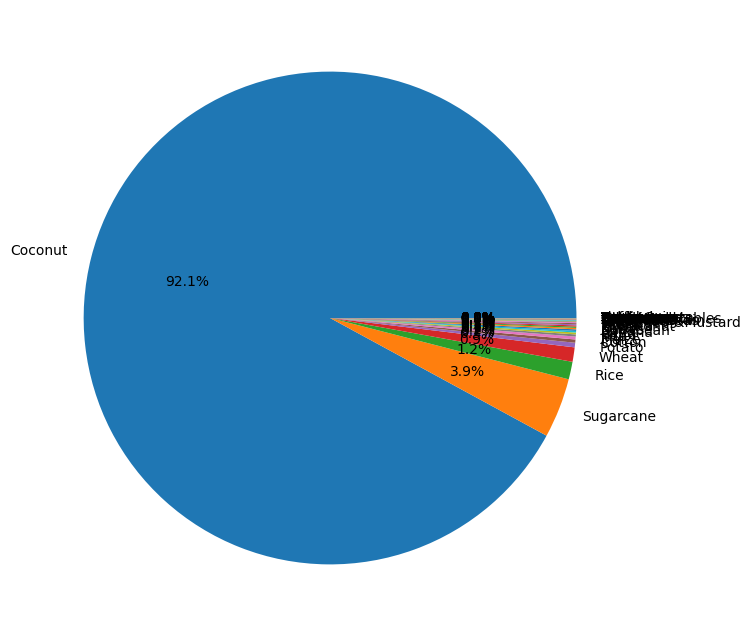

In [180]:
# we plotted pie chart of Production of different crops to check the outliers in crops
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [181]:
# we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset
# so we have decided to visualize coconut seprately

coconut_df = data[data['Crop'] == 'Coconut']

coconut_df.to_csv('coconut_df.csv')

data.drop(data[data['Crop']=='Coconut'].index,inplace=True)

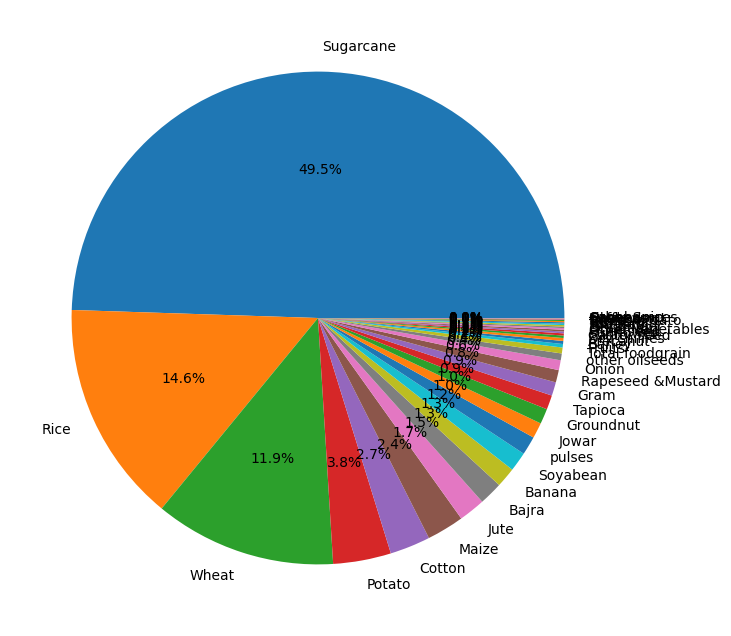

In [182]:
# we plotted pie chart between total Production and different types of crops after removing outlier 

val=data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index
# we have observed that now our dataset is balance

plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [185]:
data.to_csv('Cleaned_Crop_Data.csv')

In [186]:
new_data=pd.read_csv("Cleaned_Crop_Data.csv")
new_data

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,zone,Yield
0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Territory,1.594896
1,1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,Union Territory,0.500000
2,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Territory,3.147059
3,3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Territory,3.642045
4,4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Territory,0.229167
...,...,...,...,...,...,...,...,...,...,...
236200,246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,EastIndia,2.617647
236201,246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,EastIndia,0.738437
236202,246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,EastIndia,50.154321
236203,246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,EastIndia,2.141848


# Data Visualization

In [187]:
unique_states= new_data.State_Name.unique()
for i in range (len(unique_states)):
    print(i+1,". ",unique_states[i])

1 .  Andaman and Nicobar Islands
2 .  Andhra Pradesh
3 .  Arunachal Pradesh
4 .  Assam
5 .  Bihar
6 .  Chandigarh
7 .  Chhattisgarh
8 .  Dadra and Nagar Haveli
9 .  Goa
10 .  Gujarat
11 .  Haryana
12 .  Himachal Pradesh
13 .  Jammu and Kashmir 
14 .  Jharkhand
15 .  Karnataka
16 .  Kerala
17 .  Madhya Pradesh
18 .  Maharashtra
19 .  Manipur
20 .  Meghalaya
21 .  Mizoram
22 .  Nagaland
23 .  Odisha
24 .  Puducherry
25 .  Punjab
26 .  Rajasthan
27 .  Sikkim
28 .  Tamil Nadu
29 .  Telangana 
30 .  Tripura
31 .  Uttar Pradesh
32 .  Uttarakhand
33 .  West Bengal


In [188]:
# Group by 'State_Name' and count unique 'District_Name'
unique_districts = new_data.groupby('State_Name')['District_Name'].nunique().reset_index()
unique_districts = unique_districts.sort_values(by='District_Name',ascending=False)

print("total number of districts: ", unique_districts['District_Name'].sum())

unique_districts

total number of districts:  652


,State_Name,District_Name
30,Uttar Pradesh,75
16,Madhya Pradesh,51
4,Bihar,38
17,Maharashtra,35
25,Rajasthan,33
27,Tamil Nadu,31
14,Karnataka,30
22,Odisha,30
6,Chhattisgarh,27
3,Assam,27


In [196]:
# Filter data by seasons
kharif_data = new_data[new_data['Season'] == 'Kharif']
rabi_data = new_data[new_data['Season'] == 'Rabi']
whole_year_data = new_data[new_data['Season'] == 'Whole Year']

# Aggregate production by year for each season
kharif_production_by_year = kharif_data.groupby('Crop_Year')['Production'].sum()
rabi_production_by_year = rabi_data.groupby('Crop_Year')['Production'].sum()
whole_year_production_by_year = whole_year_data.groupby('Crop_Year')['Production'].sum()

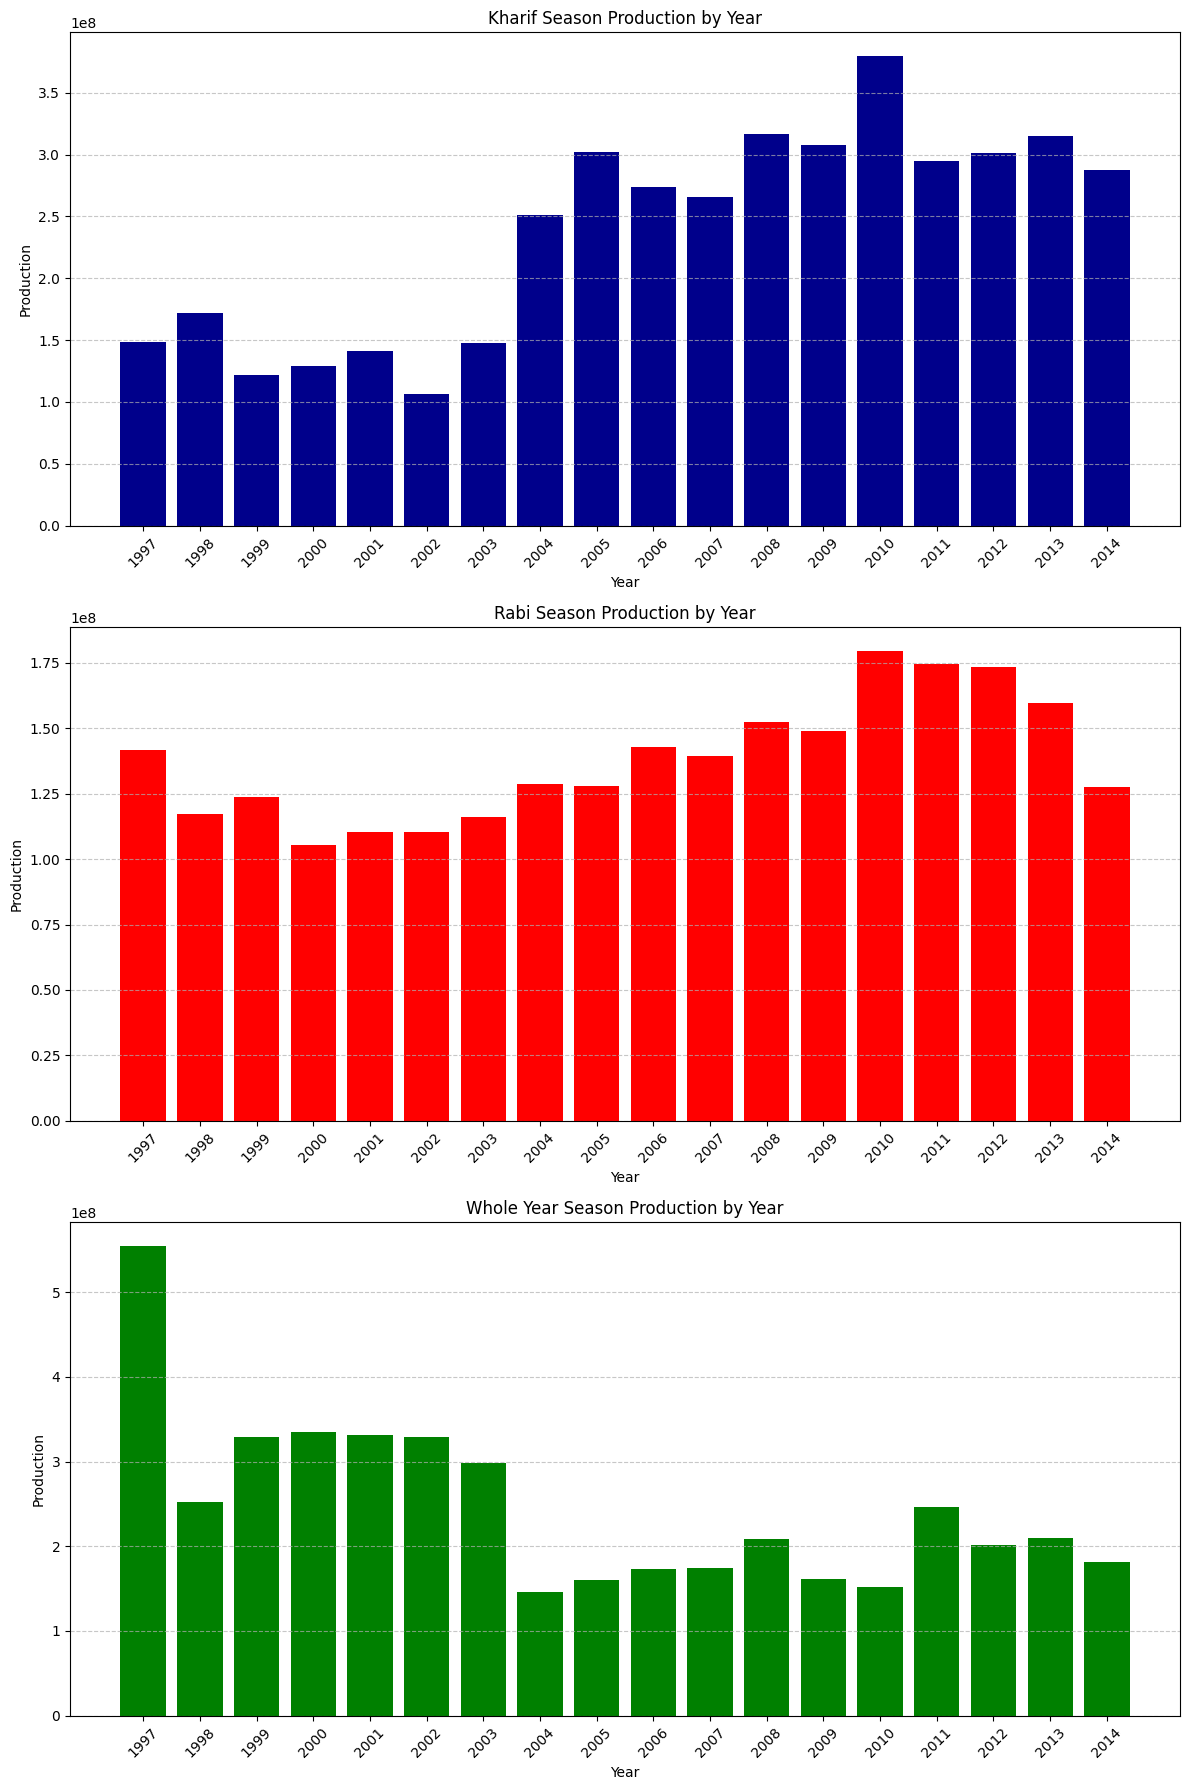

In [199]:
# Create bar charts
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Kharif Season
axs[0].bar(kharif_production_by_year.index, kharif_production_by_year, color='darkblue')
axs[0].set_title('Kharif Season Production by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Production')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_xticks(kharif_production_by_year.index)
axs[0].set_xticklabels(kharif_production_by_year.index, rotation=45)

# Rabi Season
axs[1].bar(rabi_production_by_year.index, rabi_production_by_year, color='red')
axs[1].set_title('Rabi Season Production by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Production')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_xticks(rabi_production_by_year.index)
axs[1].set_xticklabels(rabi_production_by_year.index, rotation=45)

# Whole Year Season
axs[2].bar(whole_year_production_by_year.index, whole_year_production_by_year, color='green')
axs[2].set_title('Whole Year Season Production by Year')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Production')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].set_xticks(whole_year_production_by_year.index)
axs[2].set_xticklabels(whole_year_production_by_year.index, rotation=45)

plt.tight_layout()
plt.show()

In [200]:
# Group by crop and state, and sum the production values
grouped_data = new_data.groupby(['Crop', 'State_Name'])['Production'].sum().reset_index()

# Find the top producer state for each crop
top_producers = grouped_data.loc[grouped_data.groupby('Crop')['Production'].idxmax()]

# Display the results
top_producers = top_producers.sort_values(by='Production', ascending=False)
print(top_producers)

                  Crop      State_Name    Production
592          Sugarcane   Uttar Pradesh  2.202875e+09
725              Wheat   Uttar Pradesh  4.699118e+08
492               Rice     West Bengal  2.580928e+08
427             Potato   Uttar Pradesh  1.920684e+08
300               Jute     West Bengal  1.494178e+08
101             Cotton         Gujarat  8.577750e+07
551           Soyabean  Madhya Pradesh  8.527396e+07
53              Banana      Tamil Nadu  5.871609e+07
646            Tapioca      Tamil Nadu  5.564865e+07
274              Jowar     Maharashtra  5.501858e+07
332              Maize       Karnataka  4.830890e+07
31               Bajra       Rajasthan  4.423569e+07
215               Gram  Madhya Pradesh  3.903041e+07
452  Rapeseed &Mustard       Rajasthan  3.881748e+07
762     other oilseeds     West Bengal  3.871624e+07
236          Groundnut         Gujarat  3.660930e+07
674    Total foodgrain   Uttar Pradesh  3.058716e+07
793             pulses   Uttar Pradesh  2.2708

In [204]:
# Group by crop and zone, and sum the production values
grouped_data = new_data.groupby(['Crop', 'zone'])['Production'].sum().reset_index()

# Find the top producer zone for each crop
top_producers_zone = grouped_data.loc[grouped_data.groupby('Crop')['Production'].idxmax()]

# Display the results
top_producers_zone = top_producers_zone.sort_values(by='Production', ascending=False)
print(top_producers_zone)

                  Crop         zone    Production
130          Sugarcane  North India  2.547716e+09
162              Wheat  North India  1.170469e+09
105               Rice    EastIndia  5.958420e+08
96              Potato  North India  2.119277e+08
67                Jute    EastIndia  1.872775e+08
29              Cotton   West India  1.575638e+08
145            Tapioca  South India  1.040076e+08
125           Soyabean  North India  9.727924e+07
5                Bajra  North India  9.269306e+07
11              Banana  South India  9.253878e+07
77               Maize  North India  8.819540e+07
101  Rapeseed &Mustard  North India  7.338553e+07
50                Gram  North India  6.762164e+07
66               Jowar   West India  5.765225e+07
175             pulses  North India  4.842220e+07
56           Groundnut  South India  4.832937e+07
169     other oilseeds    EastIndia  3.992196e+07
153    Total foodgrain  North India  3.381309e+07
83               Onion  South India  2.373229e+07


# Conclusion

- we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset
- so we have decided to consider coconut as an outlier and we have removed it from dataset